In [1]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
# Step 2: Load Dataset
df = pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Step 3: Define Features and Target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = df[features]
y = df[target]

# Handle missing values
X = X.fillna(X.median())


In [5]:
# Step 4: Split and Scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Step 5: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 2806426667.247134
R² Score: 0.6341189942329308


In [7]:
import pandas as pd

# Input the values for sqft, bedrooms, and bathrooms
sqft = float(input("Enter the square footage of the house: "))
bed = int(input("Enter the number of bedrooms: "))
bath = int(input("Enter the number of bathrooms: "))

# Create a DataFrame with the input values
new_house = pd.DataFrame([[sqft, bed, bath]], columns=features)

# Scale the data
new_house_scaled = scaler.transform(new_house)

# Make the prediction
predicted_price = model.predict(new_house_scaled)

# Conversion rate (you can update this as per current rates)
usd_to_inr = 83

# Convert the predicted price to rupees
predicted_price_inr = predicted_price[0] * usd_to_inr

# Print the predicted price in rupees
print(f"Predicted price for {sqft} sqft, {bed} bed, {bath} bath: ₹{predicted_price_inr:,.2f}")


Enter the square footage of the house:  5432
Enter the number of bedrooms:  5
Enter the number of bathrooms:  5


Predicted price for 5432.0 sqft, 5 bed, 5 bath: ₹52,632,660.69


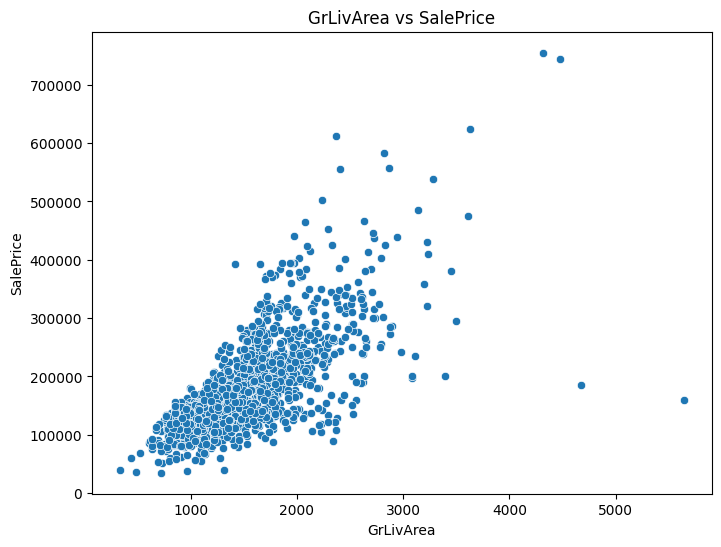

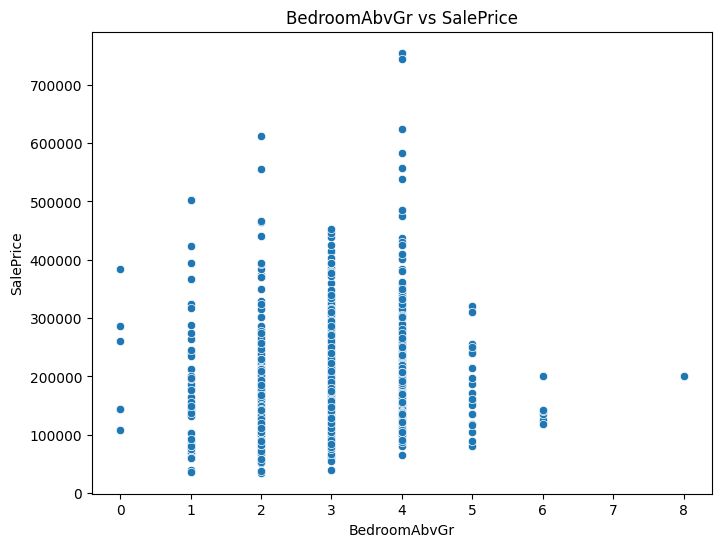

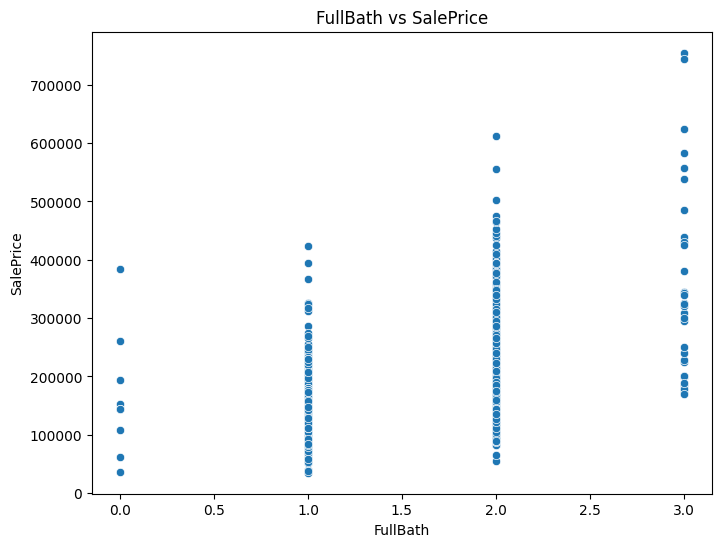

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for BedroomAbvGr vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BedroomAbvGr'], y=df['SalePrice'])
plt.title('BedroomAbvGr vs SalePrice')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for FullBath vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['FullBath'], y=df['SalePrice'])
plt.title('FullBath vs SalePrice')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()
